# Definitions
- Stimulus - velocity of a random bar pattern that moves back and forth on a screen in front of the fly. The stimulus is created by choosing a random velocity every 2 miliseconds.
- Stimulus sampling - ?? velocity changes every 2ms, data is downsampled to match that
- Delta time - dT = downsampled signal to dT=2ms
- spike-triggered average - average over chunks of stimulus T=N*dT long

# Data
- stim - time series of input veolicities, downsampled to 2ms
- rho - voltage generated from H1 neuron, downsampled to match up with stimulus timeseries (2ms intervals), and replaced with 0 or 1. 0 indicates no output from neuron, 1 there is a spike
- spike triggered average - average in N bins preciding the spike over M group of bins (TBD)


In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os


# FILENAME = 'c1p8.pickle'
FILENAME = os.path.join('..', '..', 'data', 'week2', 'c1p8_3.4.pickle')

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']

In [15]:
print('Sampling duration in minutes = ', len(stim)*2/1000/60)

Sampling duration in minutes =  20.0


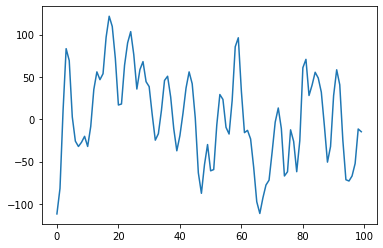

In [11]:
plt.plot(stim[:100])

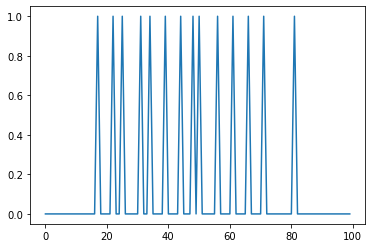

In [12]:
plt.plot(rho[:100])

# The spike-triggered average

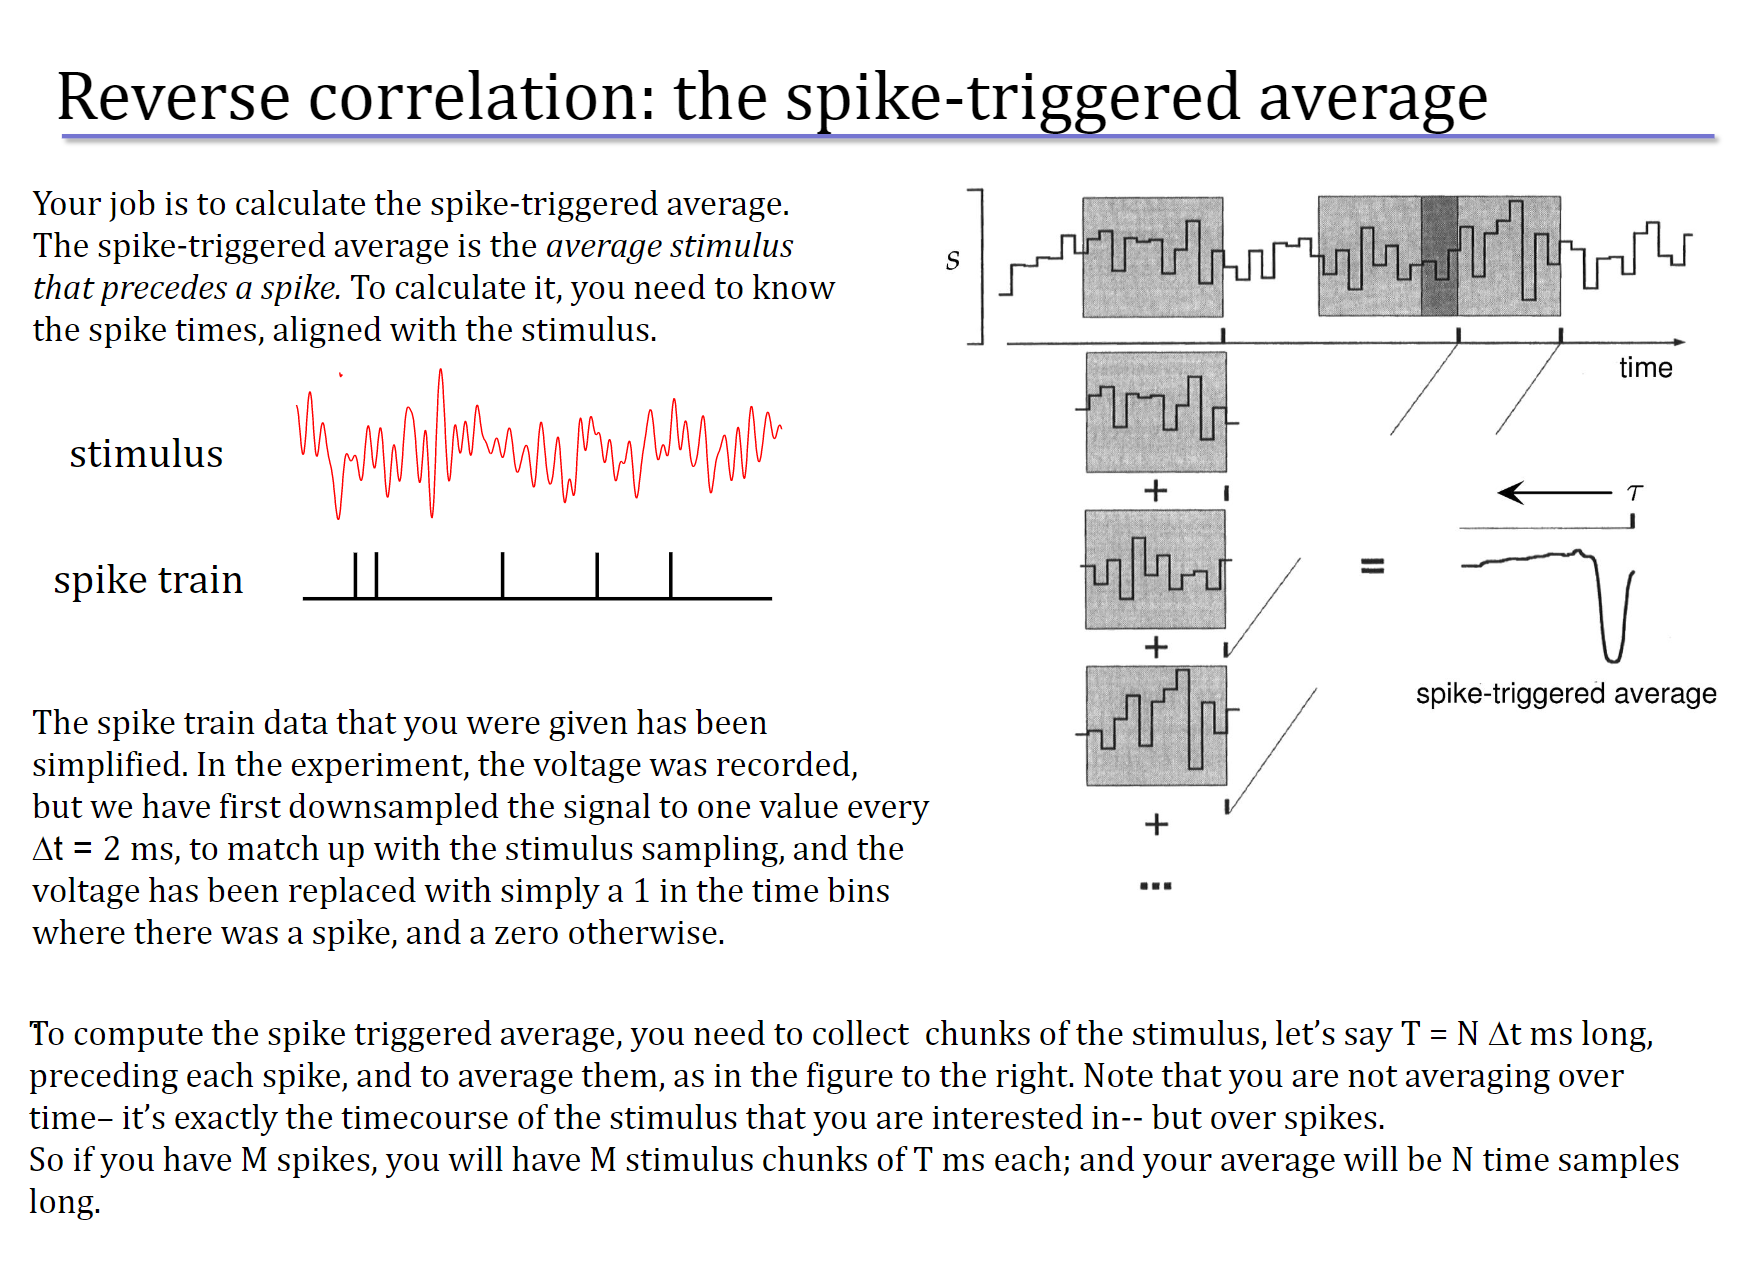

In [113]:
import numpy as np
import matplotlib.pyplot as plt


def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.

    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA

    Returns:
        spike-triggered average for specified number of timesteps before spike"""

    sta = np.zeros(num_timesteps)

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    sampling_rate_ms = 2
    skip_first_samples = int(300/sampling_rate_ms)
    spike_times = rho.nonzero()[0]
    spike_times = spike_times[spike_times > skip_first_samples]

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = len(spike_times)
    print('Spike times len = {}'.format(str(num_spikes)))
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    #
    # Your code goes here.

    for idx in spike_times:
        sta = sta + stim[idx-num_timesteps:idx]
    sta /= num_spikes
    return sta

Spike times len = 53583


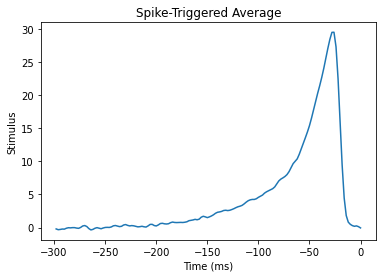

In [114]:
# Fill in these values
total_duration = 2*len(stim) # in ms
sampling_period_dT = 2
lookback_period_T = 300
num_timesteps = int(lookback_period_T / sampling_period_dT) # N

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * 2

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()

In [112]:
sampling_period_dT

2

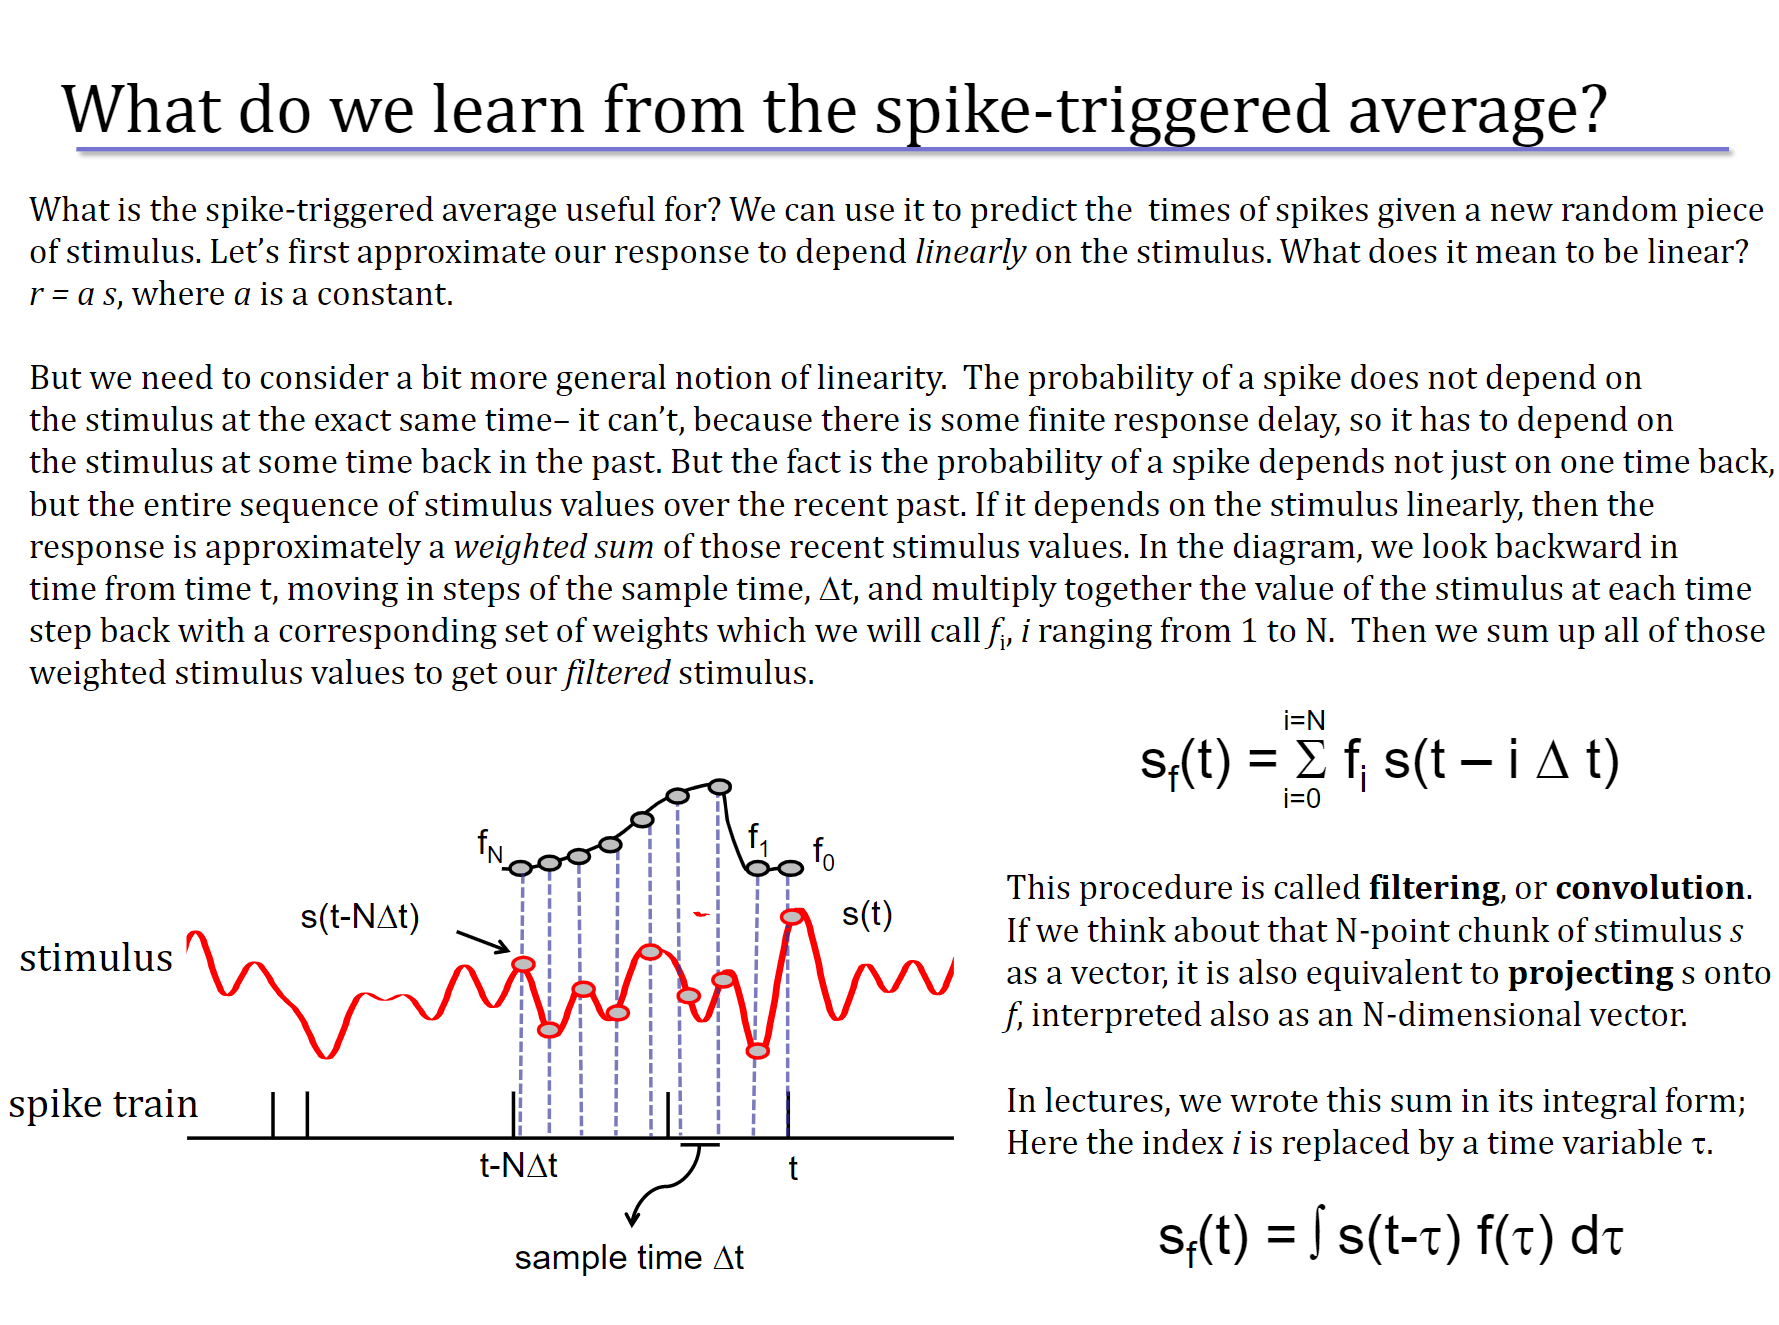

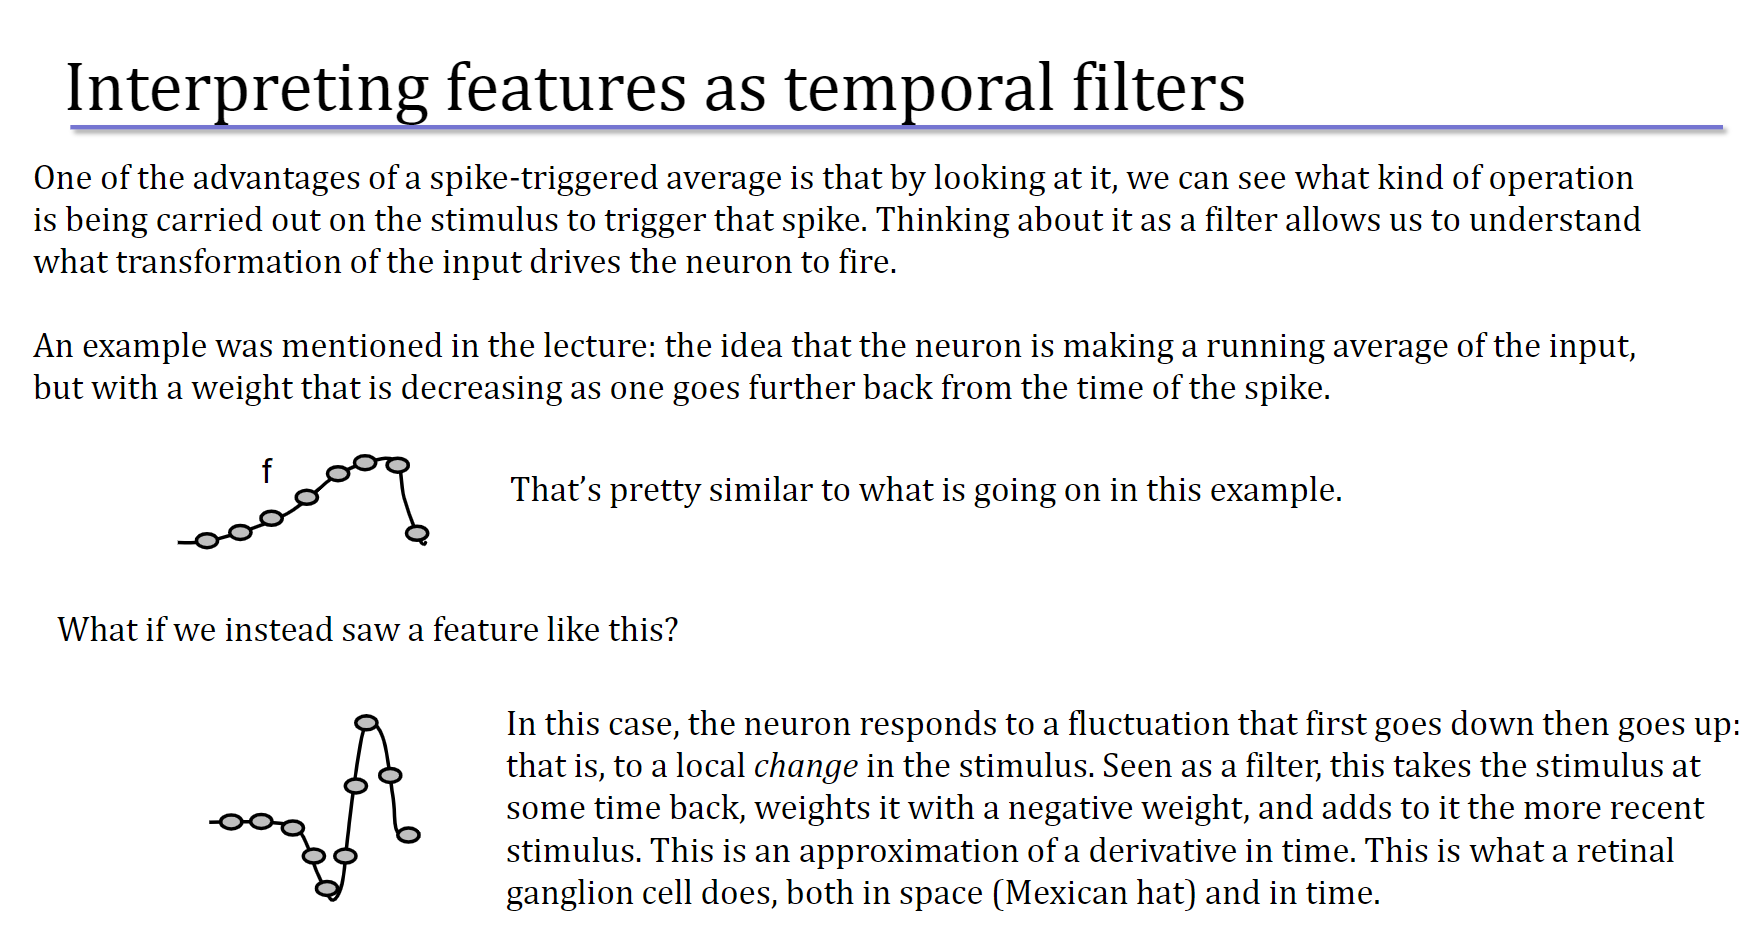

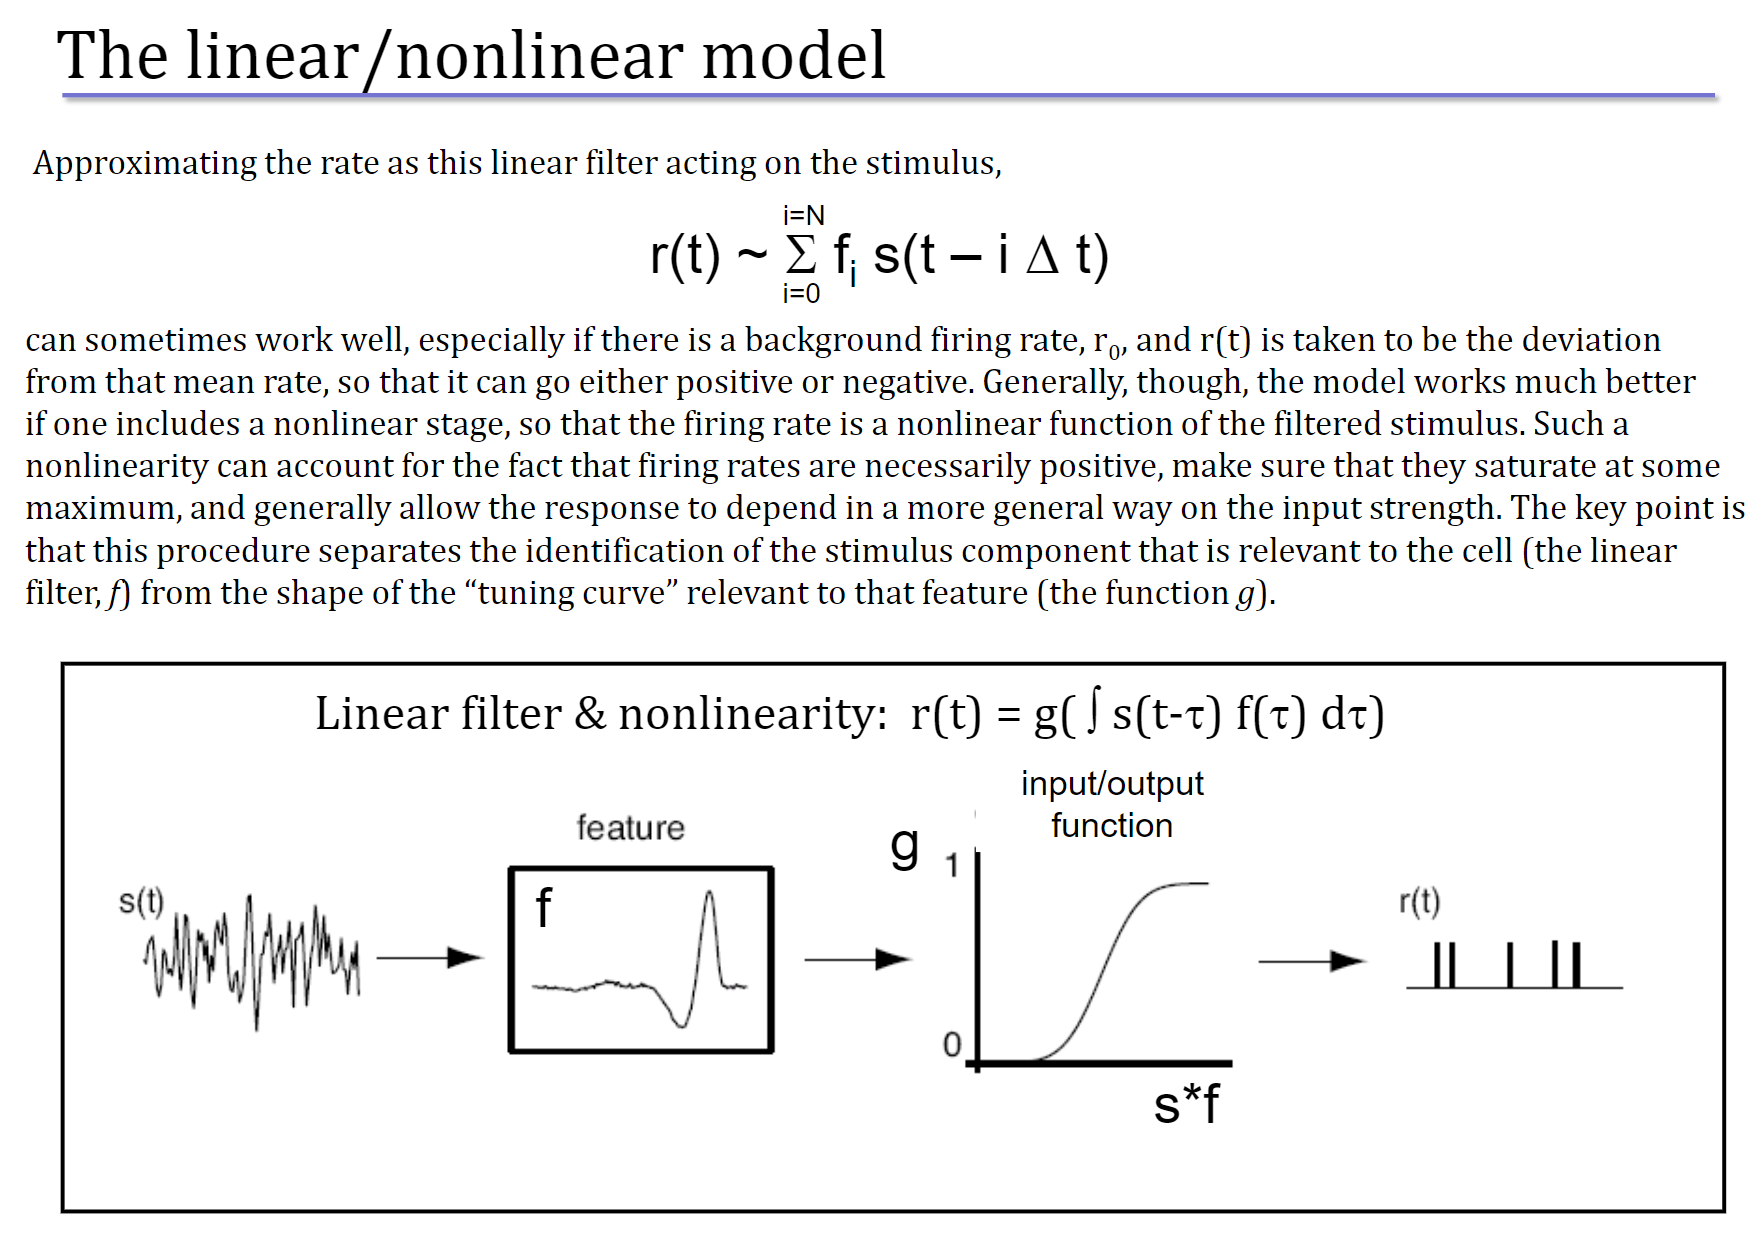

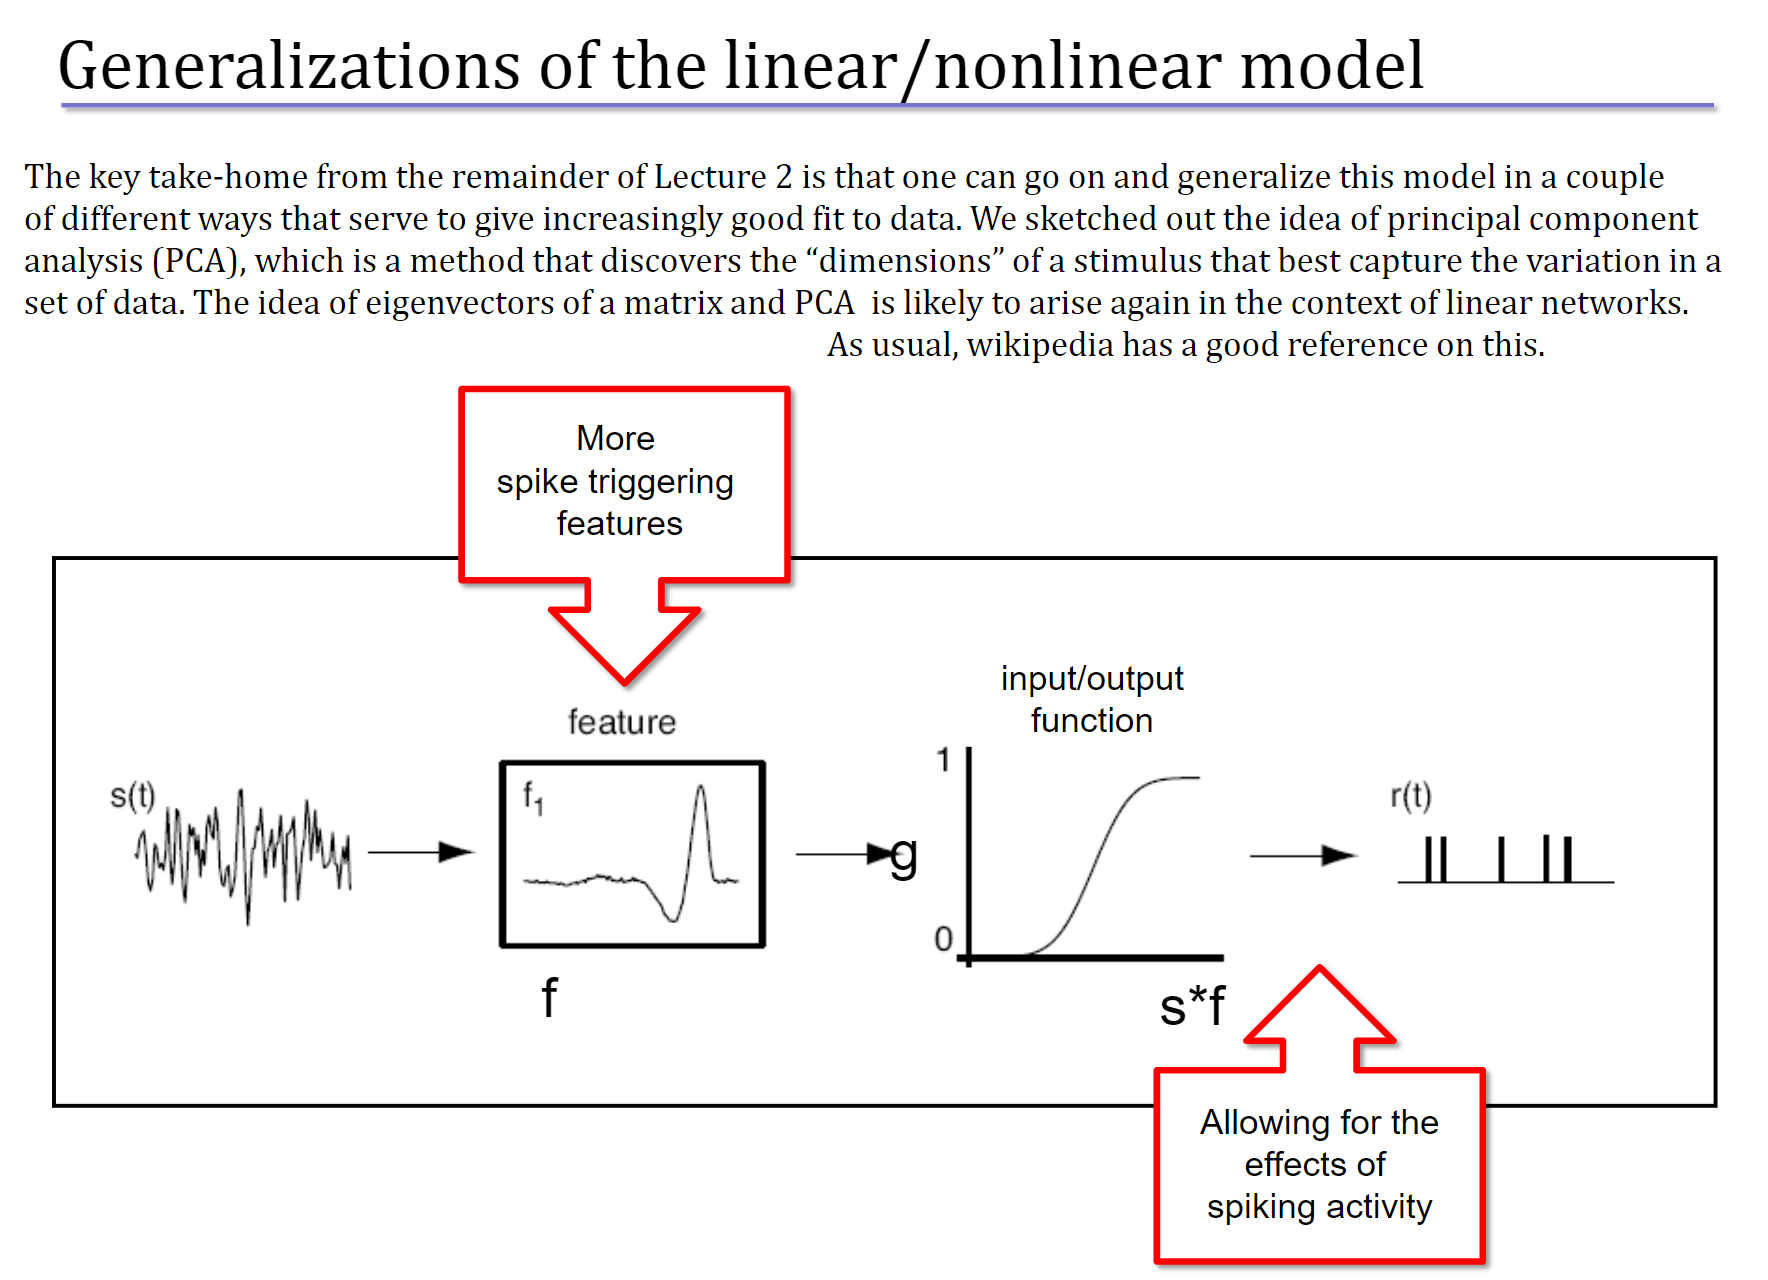

In [107]:
import math

def predict(stim, sta, start, end, threshold=0.5):
    assert start >= 300
    assert end < len(stim)
    def sigmoid(v):
        result = 1 / (1 + math.exp(-v))
        return result
    result = [0]*(end-start)
    for idx in range(start, end):
        predicted_spike = sigmoid(np.sum(sta * stim[idx-len(sta):idx])/len(sta))
        result[idx-start]= 1 if predicted_spike > threshold else 0
    return result

In [108]:
def predict_plot(start, end):
    predicted_rho = predict(stim, sta, start, end)
    x = list(range(start,end))
    plt.plot(x, rho[start:end], label = "Actual activation")
    plt.plot(x, predicted_rho, label = "Predicted activation")
    plt.legend()
    plt.show()

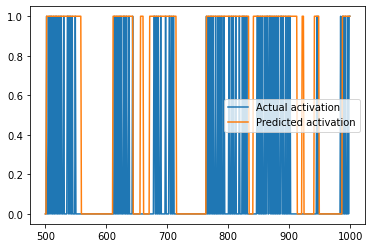

In [109]:
predict_plot(500, 1000)